<a href="https://colab.research.google.com/github/yohanesnuwara/machine-learning/blob/master/DataCamp_01_SupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Supervised Learning

## Set up.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits, load_breast_cancer
from sklearn.impute import SimpleImputer # deprecate version: from sklearn.preprocessing import Imputer
from sklearn.preprocessing import scale, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, \
Lasso, ElasticNet

from sklearn.metrics import mean_squared_error, classification_report, \
confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve

In [ ]:
!git clone https://github.com/yohanesnuwara/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 434 (delta 3), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (434/434), 39.55 MiB | 18.10 MiB/s, done.
Resolving deltas: 100% (140/140), done.


## Chapter 1. 

* Workflow of ML in Scikit-learn
* Overfitting Underfitting investigation from training and testing accuracy plot

In [ ]:
path = "https://assets.datacamp.com/production/repositories/628/datasets/35a8c54b79d559145bbeb5582de7a6169c703136/house-votes-84.csv"

df = pd.read_csv(path)

df.head(10)

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
5,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
6,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
8,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?
9,republican,n,y,n,y,y,n,n,n,n,n,?,?,y,y,n,n


dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

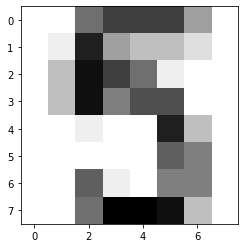

In [ ]:
# Load the digits dataset: digits
digits = load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

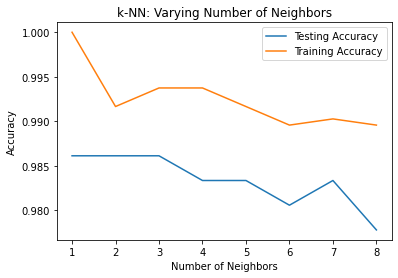

In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

From the curve above, overfit occurs at lower neighbors when training accuracy exactly 1 and test accuracy not increasing. Underfit occurs at higher neighbors when test accuracy increases at neighbor 6 to 7. 

Thus, the best neighbor is between 4-6. 

In [ ]:
digits = load_digits()

# Create feature and target arrays
# data digits from the previous 01_load_and_view_mnist.py
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


## Chapter 2.

* Linear regression
* Hold-out train-test split
* Cross-validation
* Regularization using Ridge (L2) and Lasso (L1)

In [ ]:
# Gapminder data
gap = "/content/datasets/gapminder.csv"

df = pd.read_csv(gap)

df

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...,...
134,3350832,2.11,0.5,2.489764,26.39123,15317,124.2604,76.0,13.0,America
135,26952719,2.46,0.1,4.476669,25.32054,3733,124.3462,68.7,49.2,Europe & Central Asia
136,86589342,1.86,0.4,1.479347,20.91630,4085,121.9367,75.4,26.2,East Asia & Pacific
137,13114579,5.88,13.6,0.148982,20.68321,3039,132.4493,52.0,94.9,Sub-Saharan Africa


In [ ]:
# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


Create a synthetic prediction space (X_test). 

R^2: 0.6192442167740035


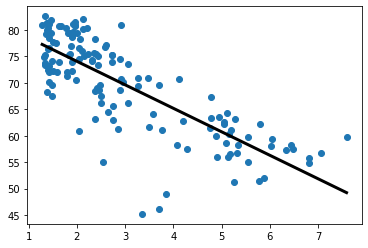

In [ ]:
X_fertility = X

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print('R^2:', reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.scatter(X_fertility, y)
plt.show()

Train test split.

In [ ]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7298987360907494
Root Mean Squared Error: 4.194027914110243


Cross-validation.

In [ ]:
# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
Average 5-Fold CV Score: 0.6168819644425119


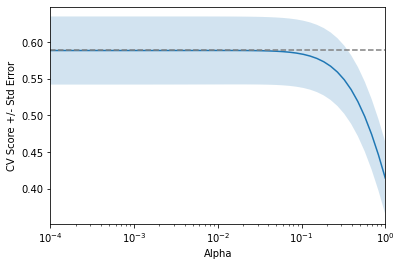

In [ ]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
   

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

In [ ]:
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso_coef = lasso.fit(X, y).coef_

# Compute and print the coefficients
# lasso_coef = lasso
print(lasso_coef)

# # Plot the coefficients
# plt.plot(range(len(df_columns)), lasso_coef)
# plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
# plt.margins(0.02)
# plt.show()

[-1.51388042]


## Chapter 3.

* Confusion matrix and classification report
* ROC-AUC curve
* Precision-Recall curve
* Hyperparameter tuning using grid search CV

Confusion matrix and classification report.

In [ ]:
BreastData = load_breast_cancer()
X = BreastData.data
y = BreastData.target
knn = KNeighborsClassifier(n_neighbors=8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42 )
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 59   4]
 [  2 106]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Logistic regression.

In [ ]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 76   4]
 [  2 146]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        80
           1       0.97      0.99      0.98       148

    accuracy                           0.97       228
   macro avg       0.97      0.97      0.97       228
weighted avg       0.97      0.97      0.97       228



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Receiver Operating Characteristic (ROC) Curve.

Area under the curve or AUC 0.9955236486486487


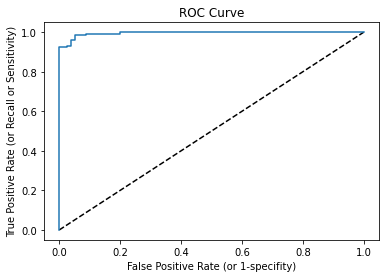

In [ ]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
print('Area under the curve or AUC', roc_auc_score(y_test, y_pred_prob))

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (or 1-specifity)')
plt.ylabel('True Positive Rate (or Recall or Sensitivity)')
plt.title('ROC Curve')
plt.show()

Precision-Recall curve.

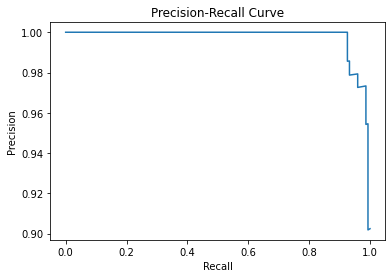

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.title('Precision-Recall Curve')
plt.plot(recall, precision)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()

Cross-validation, now the scoring uses ROC-AUC.

In [ ]:
cv = cross_val_score(logreg, X, y,cv=5, scoring='roc_auc')
print(cv)
print(np.mean(cv))

[0.99639699 0.98558795 0.99570106 0.98214286 0.99564051]
0.9910938715843727


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Hyperparameter tuning with grid search CV. Use Logistic Regression model.

In [ ]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty' : ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

In [ ]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1389495.494373136, 'penalty': 'l2'}
Best score is 0.9384910485933504


Hyperparameter tuning with grid search CV. Use Elastic Net regression.

In [ ]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio' : l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)

# compute R2 accuracy and RMSE
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_pred, y_test)

print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.751229878641464, tolerance: 0.006570220588235293
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.481806337869926, tolerance: 0.00638901098901099
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.29666799344572, tolerance: 0.006527472527472527
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.680313206064215
Tuned ElasticNet MSE: 0.07281262773545119


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.549232339777108, tolerance: 0.008090322580645163
  positive)


## Chapter 4.

* Create dummy variables
* Handling missing data
* Pipeline

Create dummy features from categorical variable.

In [ ]:
df = pd.read_csv('/content/datasets/Automobile miles per gallon.csv')
df.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [ ]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['mpg', 'displ', 'hp', 'weight', 'accel', 'size', 'origin_Asia',
       'origin_Europe', 'origin_US'],
      dtype='object')
Index(['mpg', 'displ', 'hp', 'weight', 'accel', 'size', 'origin_Europe',
       'origin_US'],
      dtype='object')


In [ ]:
df_region

,mpg,displ,hp,weight,accel,size,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,1
2,36.1,91.0,60,1800,16.4,10.0,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,1
4,34.3,97.0,78,2188,15.8,10.0,1,0
...,...,...,...,...,...,...,...,...
387,18.0,250.0,88,3021,16.5,15.0,0,1
388,27.0,151.0,90,2950,17.3,10.0,0,1
389,29.5,98.0,68,2135,16.6,10.0,0,0
390,17.5,250.0,110,3520,16.4,15.0,0,1


Handling missing data.

In [ ]:
df = pd.read_csv("/content/datasets/Diabetes.csv")

df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Column "insulin", "triceps", and "bmi" cannot be 0, so 0 means NaN. Replace 0 with NaNs. 

In [ ]:
df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      541 non-null    float64
 4   insulin      394 non-null    float64
 5   bmi          757 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values.reshape(-1,1)

imp = SimpleImputer(strategy='mean')
X = imp.fit_transform(X)

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.4, random_state= 42)

# Fit predict
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7694805194805194

Pipeline imputer and Support Vector Classifier.

In [ ]:
# Setup the pipeline steps: steps
imp = SimpleImputer(strategy='most_frequent')
svc = SVC()
steps = [('imputation', imp),('SVM', svc)]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute accuracy
print("R^2:", pipeline.score(X_test, y_test))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Compute metrics
print(classification_report(y_test, y_pred))

R^2: 0.7445887445887446
[[132  19]
 [ 40  40]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       151
           1       0.68      0.50      0.58        80

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.73       231



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Scaling.

In [ ]:
df = pd.read_csv("/content/datasets/Red wine quality.csv", delimiter=";")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values.reshape(-1,1)

print("Mean and Std before scaling: \n")
print(np.mean(X))
print(np.std(X))

X = scale(X)
print("Mean and Std after scaling: \n")
print(np.mean(X))
print(np.std(X))

Mean and Std before scaling: 

8.134219224515322
16.726533979432848
Mean and Std after scaling: 

2.546626531486538e-15
1.0


Pipeline scaling with KNN.

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values.reshape(-1,1)

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.5708333333333333
Accuracy without Scaling: 0.48541666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Pipeline for classification (imputation+scaling+SVC) with grid search CV.

In [ ]:
# Use diabetes data
df = pd.read_csv("/content/datasets/Diabetes.csv")

# Replace zeros with NaNs
df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Pipeline
imp = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()
svc = SVC()
steps = [('imputation', imp), ('scaling', scaler), ('SVC', svc)]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVC__C':[1, 10, 100],
              'SVC__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        94
           1       0.76      0.48      0.59        60

    accuracy                           0.74       154
   macro avg       0.75      0.69      0.70       154
weighted avg       0.74      0.74      0.72       154

Tuned Model Parameters: {'SVC__C': 1, 'SVC__gamma': 0.01}


Pipeline for regression (imputation+scaling+ElasticNet) with grid search CV.

In [ ]:
df

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...,...
134,3350832,2.11,0.5,2.489764,26.39123,15317,124.2604,76.0,13.0,America
135,26952719,2.46,0.1,4.476669,25.32054,3733,124.3462,68.7,49.2,Europe & Central Asia
136,86589342,1.86,0.4,1.479347,20.91630,4085,121.9367,75.4,26.2,East Asia & Pacific
137,13114579,5.88,13.6,0.148982,20.68321,3039,132.4493,52.0,94.9,Sub-Saharan Africa


In [ ]:
# Gapminder data
gap = "/content/datasets/gapminder.csv"

df = pd.read_csv(gap)

X = df[['fertility', 'BMI_male', 'GDP']].values
y = df.life.values

# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(strategy='mean')),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1188.7165804898775, tolerance: 0.4518648363636363
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1334.7975266705876, tolerance: 0.5123628000000002
  positive)


Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 0.7931034482758621}
Tuned ElasticNet R squared: 0.796748283959982
